#Behavioral analysis of social network users in relation to vaccination of covid-19


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt

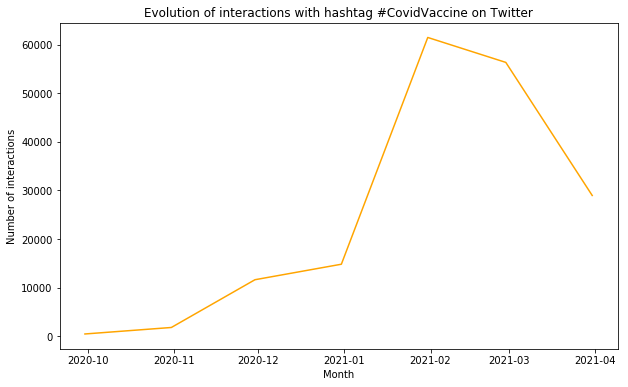

In [10]:
#Evolution of interactions with hashtag #CovidVaccine on Twitter
twitter_df=pd.read_csv('datasets/covidvaccine_hashtag.csv', low_memory=False)
twitter_data=pd.to_datetime(twitter_df['date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df = (pd.to_datetime(twitter_data.dropna())
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
df=df.groupby(pd.Grouper(key='date',freq='1M')).sum().reset_index()
df=df.sort_values(by='date')
plt.figure(figsize=(10,6))
plt.plot(df['date'],df['count'], c='orange')
plt.xlabel('Month')
plt.ylabel('Number of interactions')
plt.title('Evolution of interactions with hashtag #CovidVaccine on Twitter')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

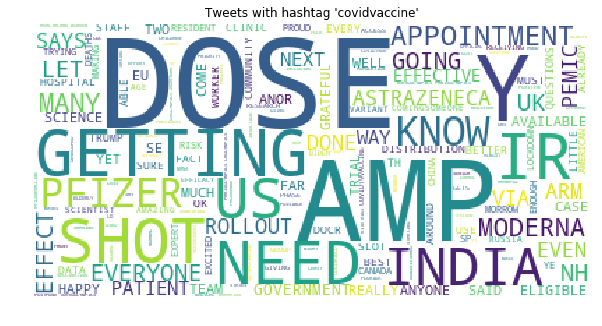

In [12]:
#Generating WordCloud of Twitter users about COVID-19 vaccines
from wordcloud import WordCloud, STOPWORDS
import re
#creates a function to remove all @'s, hashtags, and links
#Then applies it to the dataframe
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt) 
    #removes stop words
    txt = re.sub(r'the', '', txt)
    txt = re.sub(r'and', '', txt)
    txt = re.sub(r'to', '', txt)
    txt =re.sub(r'covid','',txt)
    return txt

stopwords = set(STOPWORDS)
for i in open('stopwords/twitter-stopwords.txt', "r").read().split(','):
    stopwords.add(i)
for i in open('stopwords/twitter-stopwords - TA.txt', "r").read().split(','):
    stopwords.add(i)
for i in open('stopwords/common-english-verbs.txt', "r").read().split(','):
    stopwords.add(i)    
for i in open('stopwords/stopWords.txt', "r").read().split('\n'):
    stopwords.add(i)        
stopwords.add("00A0")
stopwords.add("00BD")
stopwords.add("00B8")
stopwords.add("t")
stopwords.add("co")
stopwords.add("ed")
stopwords.add("covidvaccine")
stopwords.add("covid")
stopwords.add("corona")
stopwords.add("covid19")
stopwords.add("coronavirusvaccine")
stopwords.add("coronavaccine")
stopwords.add("got")
stopwords.add("will")
stopwords.add("day")
stopwords.add("re")
stopwords.add("coronavirus")
stopwords.add("new")
stopwords.add("now")
stopwords.add("one")
stopwords.add("vaccine")
stopwords.add("covidvaccination")
stopwords.add("vaccination")
stopwords.add("vaccinated")
stopwords.add("vaccinations")
stopwords.add("vaccinate")
stopwords.add("vaccines")
stopwords.add("s")
stopwords.add("m")
stopwords.add("covid_19")
stopwords.add("virus")
wordcloud = WordCloud(background_color="white", stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in twitter_df['text'].dropna().apply(cleanUpTweet).str.upper()]))
plt.figure(figsize=(10,6))
plt.title("Tweets with hashtag 'covidvaccine'")
plt.imshow(wordcloud)
plt.axis("off")